In Binary Classification,
if 

    0  -> 50% 
    1  -> 50%
    this is called a balanced classification problem.

else

    this is called an unbalanced classification problem.


In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score

In [180]:
default_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Default.csv')
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [181]:
print("Class Distribution:")
print(default_df['default'].value_counts(normalize=True))

Class Distribution:
No     0.9667
Yes    0.0333
Name: default, dtype: float64


In [182]:
le = LabelEncoder()
y = le.fit_transform(default_df['default'])  # Convert 'No'/'Yes' to 0/1
X = default_df.drop('default', axis=1)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [184]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)), 
    verbose_feature_names_out=False
).set_output(transform='pandas')


pipe = Pipeline([
    ('ct', ct),
    ('lr', LogisticRegression())
])

pipe.fit(X_train, y_train)    

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018E065D2EE0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018E0ACD6AF0>)],
                                   verbose_feature_names_out=False)),
                ('lr', LogisticRegression())])

Model Score

In [185]:
y_pred = pipe.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9666666666666667
 0.9666666666666667


Naive Score

In [186]:
#  Naive classifier (predicting majority class)
majority_class = np.zeros(len(y_test))
print("Naive Classifier Accuracy:", accuracy_score(y_test, majority_class))

Naive Classifier Accuracy: 0.967


### KFoldCV

In [187]:
cv_results = cross_val_score(pipe, X, y, cv=5)
print("\nCross Validation Scores:", cv_results)
print("Mean CV Score:", cv_results.mean())
print("CV Score Standard Deviation:", cv_results.std())


Cross Validation Scores: [0.975  0.9685 0.9685 0.9675 0.9645]
Mean CV Score: 0.9688000000000001
CV Score Standard Deviation: 0.0034292856398964325


<AxesSubplot:>

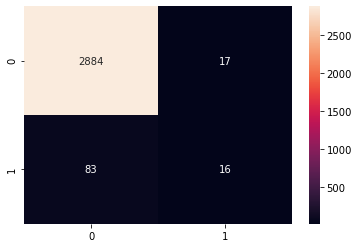

In [190]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')